<a href="https://colab.research.google.com/github/mgmboyd/DA-Capstone-Project/blob/master/BB_Final_Capstone_Project_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE PROJECT**

***Impact of Missed Appointments on Hospital Finances and Quality of Care***<br>
by Furhan Babar and Mary Grace Boyd

# **DATA BACKGROUND**

* datasource link: https://github.com/mgmboyd/DA-Capstone-Project/blob/master/

* datafile link: https://raw.githubusercontent.com/mgmboyd/DA-Capstone-Project/master/No%20Show%20-%20FY20%20FINAL%20DATA%20SET%20-%20FINAL%20CSV.csv

# **DATA GATHERING**

In [1]:
# LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import plotly.express as px
import seaborn as sns
sns.set()
!pip install sodapy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mgmboyd/DA-Capstone-Project/master/No%20Show%20-%20FY20%20FINAL%20DATA%20SET%20-%20FINAL%20CSV.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21226 entries, 0 to 21225
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mrn                     21225 non-null  float64
 1   dob                     21225 non-null  object 
 2   age                     21225 non-null  float64
 3   sex                     21225 non-null  object 
 4   phone                   21022 non-null  object 
 5   encounter_provider      21225 non-null  object 
 6   visit_date              21225 non-null  object 
 7   appt_time               21225 non-null  object 
 8   month                   21225 non-null  object 
 9   day_of_the_week         21225 non-null  object 
 10  holiday                 21225 non-null  object 
 11  weather_type            21225 non-null  object 
 12  max_temp                21225 non-null  float64
 13  mini_temp               21225 non-null  float64
 14  avg_temp                21225 non-null

In [4]:
df.shape

(21226, 50)

In [5]:
df.head()

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,max_temp,mini_temp,avg_temp,departure,hdd,cdd,precipitation,new_snow,snow_depth,status,encounter_closed,dept,dept_id,Avg_payment,visit_type,visit_type_id,copay_paid,chkin_time,check_in-check out,encounter_diagnoses,next_appt,appt_type,patient_employer,employer_state,patient_state,time_with_provider,wait_time_for_provider,zip_code,pcp,reason_for_visit,roomed_time,employer_zip,attending_provider,service,language,religion,hosp_acct,special_needs
0,10302.0,10/10/1965,54.0,Male,Hm: 646-371-8379,"ANKUR, SABHA",7/1/2019,1:20 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,ANNUAL,11790266.0,NaN,NaN,Not checked in,NaN,9/2/2020,Appointment,OTHER,NaN,NY,NaN,NaN,10026,Unknown Provider,NaN,NaN,Not specified,NaN,NaN,French,Muslim,<NONE>,NaN
1,8542.0,05/04/1970,50.0,Female,Hm: 347-755-9310,HA CT 5TH FL,7/1/2019,8:00 AM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA CT IMAGING,1.012006e+09,265.81,CT ABD PEL W,1050784.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10456,Unknown Provider,NaN,NaN,Not specified,NaN,NaN,Spanish,Catholic,<NONE>,NaN
2,12208.0,10/23/1961,58.0,Male,Hm: 917-530-4893,HA ED CT 1,7/1/2019,3:00 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,No,HA ED CT IMAGING,1.012008e+09,193.16,CT CHEST L/D INT SCREEN,1055043.0,NaN,NaN,Not checked in,NaN,NaN,Hospital Encounter,OTHER,NaN,NY,NaN,NaN,10472,"Simona Bratu, MD",NaN,NaN,Not specified,NaN,NaN,English,Unknown,<NONE>,NaN
3,21117.0,05/21/1949,70.0,Female,Hm: 917-488-8497,HA OP DIAL 7,7/1/2019,2:30 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA OP DIALYSIS,1.012005e+09,236.59,DIALYSIS 120,11790049.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10039,"Tevfik Ugur Mentes, MD",NaN,NaN,Not specified,NaN,NaN,English,Baptist,251001017,NaN
4,18461.0,02/24/1948,72.0,Male,Hm: 646-463-3866,HA OP DIAL 7,7/1/2019,6:00 AM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA OP DIALYSIS,1.012005e+09,236.59,DIALYSIS 240,11790051.0,NaN,NaN,Not checked in,NaN,8/21/2020,Appointment,OTHER,NaN,NY,NaN,NaN,11216,"Leroy Herbert, MD",NaN,NaN,Not specified,NaN,NaN,English,Unknown,251003614,NaN


In [6]:
df.tail()

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,max_temp,mini_temp,avg_temp,departure,hdd,cdd,precipitation,new_snow,snow_depth,status,encounter_closed,dept,dept_id,Avg_payment,visit_type,visit_type_id,copay_paid,chkin_time,check_in-check out,encounter_diagnoses,next_appt,appt_type,patient_employer,employer_state,patient_state,time_with_provider,wait_time_for_provider,zip_code,pcp,reason_for_visit,roomed_time,employer_zip,attending_provider,service,language,religion,hosp_acct,special_needs
21221,10301.0,08/08/1967,53.0,Female,Hm: 212-410-2501,"MENTES, TEVFIK UGUR",6/30/2020,2:00 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,TELEVISIT,11790324.0,NaN,NaN,Not checked in,NaN,9/11/2020,Appointment,OTHER (Not employed),NaN,NY,NaN,NaN,10027,"Tevfik Ugur Mentes, MD",NaN,NaN,Not specified,NaN,Primary Care,English,Pentecostal,251907478,None
21222,17796.0,12/12/1950,69.0,Female,Hm: 718-306-7707,"COBBS, RONALD",6/30/2020,1:20 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,TELEVISIT,11790324.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10460,"Ronald Cobbs, MD",NaN,NaN,Not specified,NaN,Primary Care,English,Unknown,251901977,NaN
21223,16786.0,08/02/1954,66.0,Female,Hm: 646-904-1805,HA US 1,6/30/2020,2:00 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA ULTRASOUND,1.012006e+09,150.80,US ABD COMP,1050524.0,NaN,NaN,Not checked in,NaN,10/2/2020,Appointment,NaN,NaN,NY,NaN,NaN,10039,"Zin Mar Win, MD",NaN,NaN,Not specified,NaN,NaN,Spanish,Unknown,<NONE>,NaN
21224,3993.0,01/10/1987,33.0,Female,Hm: 646-287-6647,HA US 1,6/30/2020,8:30 AM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA ULTRASOUND,1.012006e+09,150.80,US OB 14+ WK,1050532.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,OTHER (Unemployed),NaN,NY,NaN,NaN,10035,"Claude A Pericles, NP",NaN,NaN,Not specified,"Coulibaly, Ousseiny, MD",NaN,English,Christian,<NONE>,NaN
21225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(df.index[21225])

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,max_temp,mini_temp,avg_temp,departure,hdd,cdd,precipitation,new_snow,snow_depth,status,encounter_closed,dept,dept_id,Avg_payment,visit_type,visit_type_id,copay_paid,chkin_time,check_in-check out,encounter_diagnoses,next_appt,appt_type,patient_employer,employer_state,patient_state,time_with_provider,wait_time_for_provider,zip_code,pcp,reason_for_visit,roomed_time,employer_zip,attending_provider,service,language,religion,hosp_acct,special_needs
0,10302.0,10/10/1965,54.0,Male,Hm: 646-371-8379,"ANKUR, SABHA",7/1/2019,1:20 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,ANNUAL,11790266.0,NaN,NaN,Not checked in,NaN,9/2/2020,Appointment,OTHER,NaN,NY,NaN,NaN,10026,Unknown Provider,NaN,NaN,Not specified,NaN,NaN,French,Muslim,<NONE>,NaN
1,8542.0,05/04/1970,50.0,Female,Hm: 347-755-9310,HA CT 5TH FL,7/1/2019,8:00 AM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA CT IMAGING,1.012006e+09,265.81,CT ABD PEL W,1050784.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10456,Unknown Provider,NaN,NaN,Not specified,NaN,NaN,Spanish,Catholic,<NONE>,NaN
2,12208.0,10/23/1961,58.0,Male,Hm: 917-530-4893,HA ED CT 1,7/1/2019,3:00 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,No,HA ED CT IMAGING,1.012008e+09,193.16,CT CHEST L/D INT SCREEN,1055043.0,NaN,NaN,Not checked in,NaN,NaN,Hospital Encounter,OTHER,NaN,NY,NaN,NaN,10472,"Simona Bratu, MD",NaN,NaN,Not specified,NaN,NaN,English,Unknown,<NONE>,NaN
3,21117.0,05/21/1949,70.0,Female,Hm: 917-488-8497,HA OP DIAL 7,7/1/2019,2:30 PM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA OP DIALYSIS,1.012005e+09,236.59,DIALYSIS 120,11790049.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10039,"Tevfik Ugur Mentes, MD",NaN,NaN,Not specified,NaN,NaN,English,Baptist,251001017,NaN
4,18461.0,02/24/1948,72.0,Male,Hm: 646-463-3866,HA OP DIAL 7,7/1/2019,6:00 AM,"07, 2019",Monday,Regular Day,Normal,85.0,65.0,75.0,-0.3,0.0,10.0,0.0,0.0,0.0,No Show,NaN,HA OP DIALYSIS,1.012005e+09,236.59,DIALYSIS 240,11790051.0,NaN,NaN,Not checked in,NaN,8/21/2020,Appointment,OTHER,NaN,NY,NaN,NaN,11216,"Leroy Herbert, MD",NaN,NaN,Not specified,NaN,NaN,English,Unknown,251003614,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21220,9838.0,11/25/1967,52.0,Female,Hm: 646-702-3860,"PALATHINKAL, NAINA",6/30/2020,2:00 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA BARIATRIC SURGERY,1.012004e+09,132.22,TELEVISIT,11790324.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10456,"Jean Marie Claude, MD",NaN,NaN,Not specified,NaN,Bariatric,English,Unknown,251907518,NaN
21221,10301.0,08/08/1967,53.0,Female,Hm: 212-410-2501,"MENTES, TEVFIK UGUR",6/30/2020,2:00 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,TELEVISIT,11790324.0,NaN,NaN,Not checked in,NaN,9/11/2020,Appointment,OTHER (Not employed),NaN,NY,NaN,NaN,10027,"Tevfik Ugur Mentes, MD",NaN,NaN,Not specified,NaN,Primary Care,English,Pentecostal,251907478,None
21222,17796.0,12/12/1950,69.0,Female,Hm: 718-306-7707,"COBBS, RONALD",6/30/2020,1:20 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.6,0.0,9.0,0.0,0.0,0.0,No Show,NaN,HA PRIMARY CARE,1.012001e+09,99.17,TELEVISIT,11790324.0,NaN,NaN,Not checked in,NaN,NaN,Appointment,NaN,NaN,NY,NaN,NaN,10460,"Ronald Cobbs, MD",NaN,NaN,Not specified,NaN,Primary Care,English,Unknown,251901977,NaN
21223,16786.0,08/02/1954,66.0,Female,Hm: 646-904-1805,HA US 1,6/30/2020,2:00 PM,"06, 2020",Tuesday,Regular Day,Rain,80.0,67.0,73.5,-1.

In [8]:
df.columns

Index(['mrn', 'dob', 'age', 'sex', 'phone', 'encounter_provider', 'visit_date',
       'appt_time', 'month', 'day_of_the_week', 'holiday', 'weather_type',
       'max_temp', 'mini_temp', 'avg_temp', 'departure', 'hdd', 'cdd',
       'precipitation', 'new_snow', 'snow_depth', 'status', 'encounter_closed',
       'dept', 'dept_id', 'Avg_payment', 'visit_type', 'visit_type_id',
       'copay_paid', 'chkin_time', 'check_in-check out', 'encounter_diagnoses',
       'next_appt', 'appt_type', 'patient_employer', 'employer_state',
       'patient_state', 'time_with_provider', 'wait_time_for_provider',
       'zip_code', 'pcp', 'reason_for_visit', 'roomed_time', 'employer_zip',
       'attending_provider', 'service', 'language', 'religion', 'hosp_acct',
       'special_needs'],
      dtype='object')

# **DATA WRANGLING**

In [9]:
# Drop Columns
ns_df = df.drop(columns=['chkin_time', 'check_in-check out', 'next_appt', 'encounter_closed', 'time_with_provider', 'status', 
                         'wait_time_for_provider', 'roomed_time', 'hosp_acct', 'copay_paid', 'max_temp', 'mini_temp', 'departure', 'hdd', 'cdd',
                         'next_appt', 'snow_depth'])

In [10]:
ns_df.columns

Index(['mrn', 'dob', 'age', 'sex', 'phone', 'encounter_provider', 'visit_date',
       'appt_time', 'month', 'day_of_the_week', 'holiday', 'weather_type',
       'avg_temp', 'precipitation', 'new_snow', 'dept', 'dept_id',
       'Avg_payment', 'visit_type', 'visit_type_id', 'encounter_diagnoses',
       'appt_type', 'patient_employer', 'employer_state', 'patient_state',
       'zip_code', 'pcp', 'reason_for_visit', 'employer_zip',
       'attending_provider', 'service', 'language', 'religion',
       'special_needs'],
      dtype='object')

In [11]:
# Copying "sex" column
ns_df['sex_id'] = ns_df['sex']

In [12]:
# # Changing string values to integers for plotting purposes
ns_df['sex_id'].replace('Female', 1, inplace=True)
ns_df['sex_id'].replace('Male', 2, inplace=True)

In [13]:
# Change type
ns_df['dob'] = pd.to_datetime(ns_df['dob'])

In [14]:
# Change type
ns_df['visit_date'] = pd.to_datetime(ns_df['visit_date'])

In [15]:
# Add month column
ns_df['month'] = pd.DatetimeIndex(ns_df['visit_date']).month

In [16]:
# Add Year Column
ns_df['year'] = pd.DatetimeIndex(ns_df['visit_date']).year

In [17]:
# Change type
ns_df['mrn'] = ns_df['mrn'].astype('Int64')

In [18]:
# Change type
ns_df['age'] = ns_df['age'].astype('Int64')

In [19]:
# Change type
ns_df['dept_id'] = ns_df['dept_id'].astype('Int64')

In [20]:
# Change type
ns_df['visit_type_id'] = ns_df['visit_type_id'].astype('Int64')

In [21]:
# Change type
ns_df['sex_id'] = ns_df['sex_id'].astype('Int64')

In [22]:
# Change type
ns_df['year'] = ns_df['year'].astype('Int64')

In [23]:
# Change type
ns_df['month'] = ns_df['month'].astype('Int64')

In [24]:
ns_df['value_count'] = 1
ns_df

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,avg_temp,precipitation,new_snow,dept,dept_id,Avg_payment,visit_type,visit_type_id,encounter_diagnoses,appt_type,patient_employer,employer_state,patient_state,zip_code,pcp,reason_for_visit,employer_zip,attending_provider,service,language,religion,special_needs,sex_id,year,value_count
0,10302,1965-10-10,54,Male,Hm: 646-371-8379,"ANKUR, SABHA",2019-07-01,1:20 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,ANNUAL,11790266,NaN,Appointment,OTHER,NaN,NY,10026,Unknown Provider,NaN,Not specified,NaN,NaN,French,Muslim,NaN,2,2019,1
1,8542,1970-05-04,50,Female,Hm: 347-755-9310,HA CT 5TH FL,2019-07-01,8:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA CT IMAGING,1012006110,265.81,CT ABD PEL W,1050784,NaN,Appointment,NaN,NaN,NY,10456,Unknown Provider,NaN,Not specified,NaN,NaN,Spanish,Catholic,NaN,1,2019,1
2,12208,1961-10-23,58,Male,Hm: 917-530-4893,HA ED CT 1,2019-07-01,3:00 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA ED CT IMAGING,1012008321,193.16,CT CHEST L/D INT SCREEN,1055043,NaN,Hospital Encounter,OTHER,NaN,NY,10472,"Simona Bratu, MD",NaN,Not specified,NaN,NaN,English,Unknown,NaN,2,2019,1
3,21117,1949-05-21,70,Female,Hm: 917-488-8497,HA OP DIAL 7,2019-07-01,2:30 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 120,11790049,NaN,Appointment,NaN,NaN,NY,10039,"Tevfik Ugur Mentes, MD",NaN,Not specified,NaN,NaN,English,Baptist,NaN,1,2019,1
4,18461,1948-02-24,72,Male,Hm: 646-463-3866,HA OP DIAL 7,2019-07-01,6:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 240,11790051,NaN,Appointment,OTHER,NaN,NY,11216,"Leroy Herbert, MD",NaN,Not specified,NaN,NaN,English,Unknown,NaN,2,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,10301,1967-08-08,53,Female,Hm: 212-410-2501,"MENTES, TEVFIK UGUR",2020-06-30,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,NaN,Appointment,OTHER (Not employed),NaN,NY,10027,"Tevfik Ugur Mentes, MD",NaN,Not specified,NaN,Primary Care,English,Pentecostal,None,1,2020,1
21222,17796,1950-12-12,69,Female,Hm: 718-306-7707,"COBBS, RONALD",2020-06-30,1:20 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,NaN,Appointment,NaN,NaN,NY,10460,"Ronald Cobbs, MD",NaN,Not specified,NaN,Primary Care,English,Unknown,NaN,1,2020,1
21223,16786,1954-08-02,66,Female,Hm: 646-904-1805,HA US 1,2020-06-30,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA ULTRASOUND,1012006160,150.80,US ABD COMP,1050524,NaN,Appointment,NaN,NaN,NY,10039,"Zin Mar Win, MD",NaN,Not specified,NaN,NaN,Spanish,Unknown,NaN,1,2020,1
21224,3993,1987-01-10,33,Female,Hm: 646-287-6647,HA US 1,2020-06-30,8:30 AM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA ULTRASOUND,1012006160,150.80,US OB 14+ WK,1050532,NaN,Appointment,OTHER (Unemployed),NaN,NY,10035,"Claude A Pericles, NP",NaN,Not specified,"Coulibaly, Ousseiny, MD",NaN,English,Christian,NaN,1,2020,1


In [25]:
ns_df.drop(ns_df.index[21225])

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,avg_temp,precipitation,new_snow,dept,dept_id,Avg_payment,visit_type,visit_type_id,encounter_diagnoses,appt_type,patient_employer,employer_state,patient_state,zip_code,pcp,reason_for_visit,employer_zip,attending_provider,service,language,religion,special_needs,sex_id,year,value_count
0,10302,1965-10-10,54,Male,Hm: 646-371-8379,"ANKUR, SABHA",2019-07-01,1:20 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,ANNUAL,11790266,NaN,Appointment,OTHER,NaN,NY,10026,Unknown Provider,NaN,Not specified,NaN,NaN,French,Muslim,NaN,2,2019,1
1,8542,1970-05-04,50,Female,Hm: 347-755-9310,HA CT 5TH FL,2019-07-01,8:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA CT IMAGING,1012006110,265.81,CT ABD PEL W,1050784,NaN,Appointment,NaN,NaN,NY,10456,Unknown Provider,NaN,Not specified,NaN,NaN,Spanish,Catholic,NaN,1,2019,1
2,12208,1961-10-23,58,Male,Hm: 917-530-4893,HA ED CT 1,2019-07-01,3:00 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA ED CT IMAGING,1012008321,193.16,CT CHEST L/D INT SCREEN,1055043,NaN,Hospital Encounter,OTHER,NaN,NY,10472,"Simona Bratu, MD",NaN,Not specified,NaN,NaN,English,Unknown,NaN,2,2019,1
3,21117,1949-05-21,70,Female,Hm: 917-488-8497,HA OP DIAL 7,2019-07-01,2:30 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 120,11790049,NaN,Appointment,NaN,NaN,NY,10039,"Tevfik Ugur Mentes, MD",NaN,Not specified,NaN,NaN,English,Baptist,NaN,1,2019,1
4,18461,1948-02-24,72,Male,Hm: 646-463-3866,HA OP DIAL 7,2019-07-01,6:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 240,11790051,NaN,Appointment,OTHER,NaN,NY,11216,"Leroy Herbert, MD",NaN,Not specified,NaN,NaN,English,Unknown,NaN,2,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21220,9838,1967-11-25,52,Female,Hm: 646-702-3860,"PALATHINKAL, NAINA",2020-06-30,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA BARIATRIC SURGERY,1012004500,132.22,TELEVISIT,11790324,NaN,Appointment,NaN,NaN,NY,10456,"Jean Marie Claude, MD",NaN,Not specified,NaN,Bariatric,English,Unknown,NaN,1,2020,1
21221,10301,1967-08-08,53,Female,Hm: 212-410-2501,"MENTES, TEVFIK UGUR",2020-06-30,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,NaN,Appointment,OTHER (Not employed),NaN,NY,10027,"Tevfik Ugur Mentes, MD",NaN,Not specified,NaN,Primary Care,English,Pentecostal,None,1,2020,1
21222,17796,1950-12-12,69,Female,Hm: 718-306-7707,"COBBS, RONALD",2020-06-30,1:20 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,NaN,Appointment,NaN,NaN,NY,10460,"Ronald Cobbs, MD",NaN,Not specified,NaN,Primary Care,English,Unknown,NaN,1,2020,1
21223,16786,1954-08-02,66,Female,Hm: 646-904-1805,HA US 1,2020-06-30,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA ULTRASOUND,1012006160,150.80,US ABD COMP,1050524,NaN,Appointment,NaN,NaN,NY,10039,"Zin Mar Win, MD",NaN,Not specified,NaN,NaN,Spanish,Unknown,NaN,1,2020,1


In [26]:
ns_df["encounter_diagnoses"].fillna("Not Specified", inplace = True) 

In [27]:
ns_df["patient_employer"].fillna("Not Specified", inplace = True) 

In [28]:
ns_df["employer_state"].fillna("Not Specified", inplace = True) 

In [29]:
ns_df["reason_for_visit"].fillna("Not Specified", inplace = True) 

In [30]:
ns_df["attending_provider"].fillna("Not Specified", inplace = True) 

In [31]:
ns_df["service"].fillna("Not Specified", inplace = True) 

In [32]:
ns_df["language"].fillna("Not Specified", inplace = True) 

In [33]:
ns_df["special_needs"].fillna("Not Specified", inplace = True) 

In [34]:
ns_df.fillna(0)

,mrn,dob,age,sex,phone,encounter_provider,visit_date,appt_time,month,day_of_the_week,holiday,weather_type,avg_temp,precipitation,new_snow,dept,dept_id,Avg_payment,visit_type,visit_type_id,encounter_diagnoses,appt_type,patient_employer,employer_state,patient_state,zip_code,pcp,reason_for_visit,employer_zip,attending_provider,service,language,religion,special_needs,sex_id,year,value_count
0,10302,1965-10-10 00:00:00,54,Male,Hm: 646-371-8379,"ANKUR, SABHA",2019-07-01 00:00:00,1:20 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,ANNUAL,11790266,Not Specified,Appointment,OTHER,Not Specified,NY,10026,Unknown Provider,Not Specified,Not specified,Not Specified,Not Specified,French,Muslim,Not Specified,2,2019,1
1,8542,1970-05-04 00:00:00,50,Female,Hm: 347-755-9310,HA CT 5TH FL,2019-07-01 00:00:00,8:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA CT IMAGING,1012006110,265.81,CT ABD PEL W,1050784,Not Specified,Appointment,Not Specified,Not Specified,NY,10456,Unknown Provider,Not Specified,Not specified,Not Specified,Not Specified,Spanish,Catholic,Not Specified,1,2019,1
2,12208,1961-10-23 00:00:00,58,Male,Hm: 917-530-4893,HA ED CT 1,2019-07-01 00:00:00,3:00 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA ED CT IMAGING,1012008321,193.16,CT CHEST L/D INT SCREEN,1055043,Not Specified,Hospital Encounter,OTHER,Not Specified,NY,10472,"Simona Bratu, MD",Not Specified,Not specified,Not Specified,Not Specified,English,Unknown,Not Specified,2,2019,1
3,21117,1949-05-21 00:00:00,70,Female,Hm: 917-488-8497,HA OP DIAL 7,2019-07-01 00:00:00,2:30 PM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 120,11790049,Not Specified,Appointment,Not Specified,Not Specified,NY,10039,"Tevfik Ugur Mentes, MD",Not Specified,Not specified,Not Specified,Not Specified,English,Baptist,Not Specified,1,2019,1
4,18461,1948-02-24 00:00:00,72,Male,Hm: 646-463-3866,HA OP DIAL 7,2019-07-01 00:00:00,6:00 AM,7,Monday,Regular Day,Normal,75.0,0.0,0.0,HA OP DIALYSIS,1012005401,236.59,DIALYSIS 240,11790051,Not Specified,Appointment,OTHER,Not Specified,NY,11216,"Leroy Herbert, MD",Not Specified,Not specified,Not Specified,Not Specified,English,Unknown,Not Specified,2,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21221,10301,1967-08-08 00:00:00,53,Female,Hm: 212-410-2501,"MENTES, TEVFIK UGUR",2020-06-30 00:00:00,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,Not Specified,Appointment,OTHER (Not employed),Not Specified,NY,10027,"Tevfik Ugur Mentes, MD",Not Specified,Not specified,Not Specified,Primary Care,English,Pentecostal,None,1,2020,1
21222,17796,1950-12-12 00:00:00,69,Female,Hm: 718-306-7707,"COBBS, RONALD",2020-06-30 00:00:00,1:20 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA PRIMARY CARE,1012001170,99.17,TELEVISIT,11790324,Not Specified,Appointment,Not Specified,Not Specified,NY,10460,"Ronald Cobbs, MD",Not Specified,Not specified,Not Specified,Primary Care,English,Unknown,Not Specified,1,2020,1
21223,16786,1954-08-02 00:00:00,66,Female,Hm: 646-904-1805,HA US 1,2020-06-30 00:00:00,2:00 PM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA ULTRASOUND,1012006160,150.80,US ABD COMP,1050524,Not Specified,Appointment,Not Specified,Not Specified,NY,10039,"Zin Mar Win, MD",Not Specified,Not specified,Not Specified,Not Specified,Spanish,Unknown,Not Specified,1,2020,1
21224,3993,1987-01-10 00:00:00,33,Female,Hm: 646-287-6647,HA US 1,2020-06-30 00:00:00,8:30 AM,6,Tuesday,Regular Day,Rain,73.5,0.0,0.0,HA ULTRASOUND,1012006160,150.80,US OB 14+ WK,1050532,Not Specified,Appointment,OTHER (Unemployed),Not Specified,NY,10035,"Claude A Pericles, NP",Not Specified,Not specified,"Coulibaly, Ousseiny, MD",Not Specified,English,Christian,Not Specified,1,2020,1


In [35]:
ns_df = ns_df.drop(ns_df.index[21225])

In [36]:
ns_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21225 entries, 0 to 21224
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   mrn                  21225 non-null  Int64         
 1   dob                  21225 non-null  datetime64[ns]
 2   age                  21225 non-null  Int64         
 3   sex                  21225 non-null  object        
 4   phone                21022 non-null  object        
 5   encounter_provider   21225 non-null  object        
 6   visit_date           21225 non-null  datetime64[ns]
 7   appt_time            21225 non-null  object        
 8   month                21225 non-null  Int64         
 9   day_of_the_week      21225 non-null  object        
 10  holiday              21225 non-null  object        
 11  weather_type         21225 non-null  object        
 12  avg_temp             21225 non-null  float64       
 13  precipitation        21225 non-

In [37]:
ns_df.describe()

,mrn,age,month,avg_temp,precipitation,new_snow,dept_id,Avg_payment,visit_type_id,sex_id,year,value_count
count,21225.000000,21225.000000,21225.000000,21225.000000,21225.000000,21225.000000,2.122500e+04,21225.000000,2.122500e+04,21225.000000,21225.000000,21225.0
mean,10613.000000,50.117597,6.804947,51.797927,0.120880,0.015863,1.012004e+09,143.764581,1.079607e+07,1.365984,2019.408481,1.0
std,6127.274068,19.254038,3.639074,22.540563,0.310794,0.118912,2.500277e+03,47.789955,3.117661e+06,0.481716,0.491564,0.0
min,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.012001e+09,0.000000,1.002000e+03,1.000000,2019.000000,1.0
25%,5307.000000,37.000000,3.000000,40.000000,0.000000,0.000000,1.012001e+09,99.170000,1.179016e+07,1.000000,2019.000000,1.0
50%,10613.000000,53.000000,7.000000,52.500000,0.000000,0.000000,1.012003e+09,132.220000,1.179020e+07,1.000000,2019.000000,1.0
75%,15919.000000,64.000000,10.000000,71.000000,0.070000,0.000000,1.012005e+09,185.020000,1.179029e+07,2.000000,2020.000000,1.0
max,21225.000000,99.000000,12.000000,88.500000,1.920000,2.100000,1.012010e+09,442.940000,1.179066e+07,2.000000,2020.000000,1.0


In [38]:
ns_df.columns

Index(['mrn', 'dob', 'age', 'sex', 'phone', 'encounter_provider', 'visit_date',
       'appt_time', 'month', 'day_of_the_week', 'holiday', 'weather_type',
       'avg_temp', 'precipitation', 'new_snow', 'dept', 'dept_id',
       'Avg_payment', 'visit_type', 'visit_type_id', 'encounter_diagnoses',
       'appt_type', 'patient_employer', 'employer_state', 'patient_state',
       'zip_code', 'pcp', 'reason_for_visit', 'employer_zip',
       'attending_provider', 'service', 'language', 'religion',
       'special_needs', 'sex_id', 'year', 'value_count'],
      dtype='object')

In [39]:
# Re-arranged columns
ns_df = ns_df[['mrn', 'dob', 'age', 'sex', 'sex_id', 'phone', 'encounter_provider', 'visit_date',
       'appt_time', 'month', 'year', 'day_of_the_week', 'holiday', 'weather_type',
       'avg_temp', 'precipitation', 'new_snow', 'dept', 'dept_id',
       'Avg_payment', 'visit_type', 'visit_type_id', 'encounter_diagnoses',
       'appt_type', 'patient_employer', 'employer_state', 'patient_state',
       'zip_code', 'pcp', 'reason_for_visit', 'employer_zip', 'attending_provider', 'service', 'language', 'religion','special_needs', 'value_count']]

In [40]:
ns_df.shape

(21225, 37)

# EDA (Exploratoty Data Analysis)

In [62]:
ns_year = ns_df['year']
ns_month = ns_df['month']
ns_sexid = ns_df['sex_id']
ns_age = ns_df['age']
ns_age = ns_df['age'].value_counts()
ns_deptid = ns_df['dept_id']
ns_mrn = ns_df['mrn']
ns_sex = ns_df['sex']

In [60]:
ns_sexid.value_counts()

1    13457
2     7768
Name: sex_id, dtype: Int64

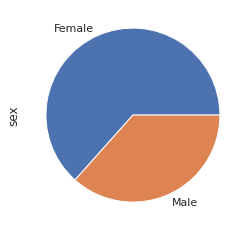

In [61]:
df1 = ns_df['sex'].value_counts()
df1.plot(kind='pie')

63.40165138244629
36.59835159778595


([<matplotlib.patches.Wedge at 0x7f1b0d489f28>,
 [Text(-0.4495660667970011, 1.0039374241379164, 'Female'),
  Text(0.4495661607924041, -1.0039373820464992, 'Male')],
 [Text(-0.24521785461654605, 0.5476022313479543, '63.4017%\n(13457)'),
  Text(0.24521790588676584, -0.5476022083889995, '36.5984%\n(7768)')])

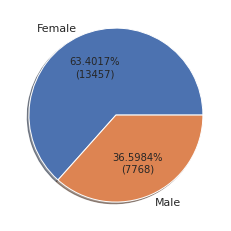

In [67]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)
    
v_counts = ns_sex.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True)

In [43]:
df2.plot(kind='line')

NameError: ignored

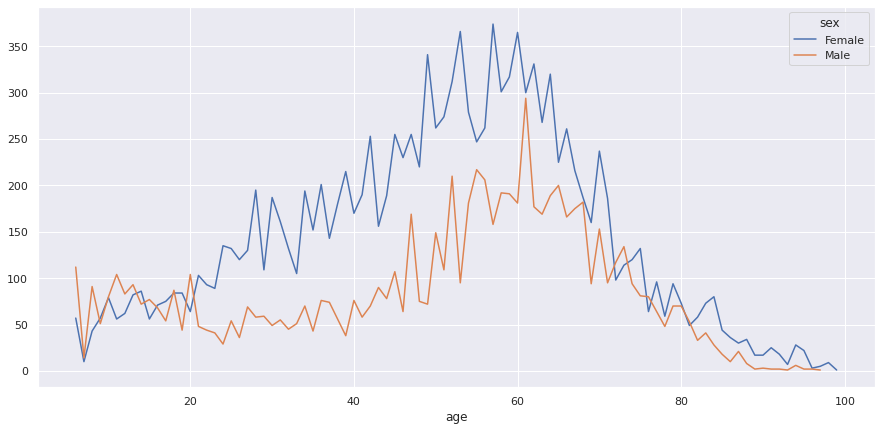

In [44]:
fig, ax = plt.subplots(figsize=(15,7))
ns_df.groupby(['age','sex']).count()['month'].unstack().plot(ax=ax)

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

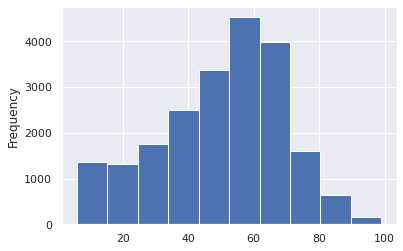

In [46]:
ns_df['age'].plot.hist()

In [47]:
# Exporting final data set for data visualization
ns_df.to_csv('ns_df.csv')

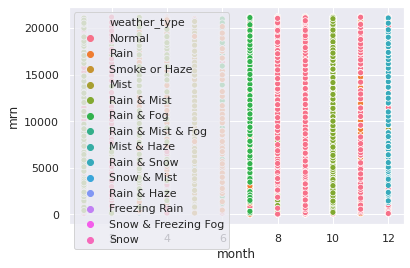

In [48]:
ax = sns.scatterplot(x="month", y="mrn",hue="weather_type",data=ns_df)

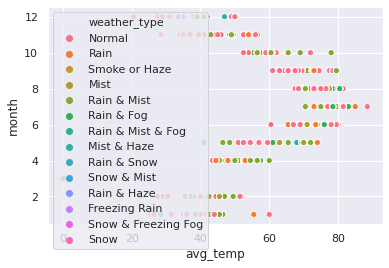

In [49]:
ax = sns.scatterplot(x="avg_temp", y="month",hue="weather_type",data=ns_df)

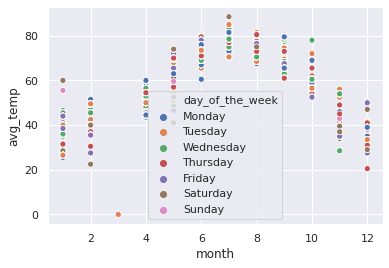

In [50]:
ax = sns.scatterplot(x="month", y="avg_temp",hue="day_of_the_week",data=ns_df)

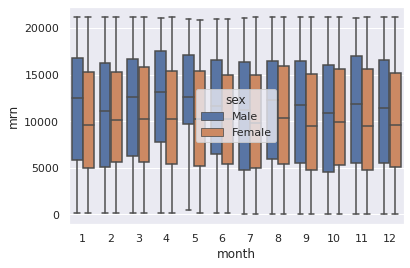

In [51]:
ax = sns.boxplot(x="month", y="mrn", hue="sex", data=ns_df)

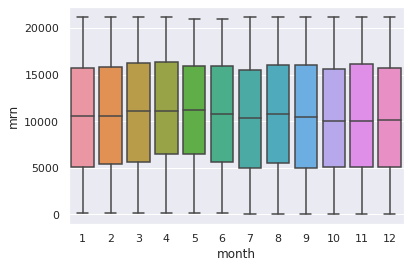

In [52]:
ax = sns.boxplot(x="month", y="mrn", data=ns_df)

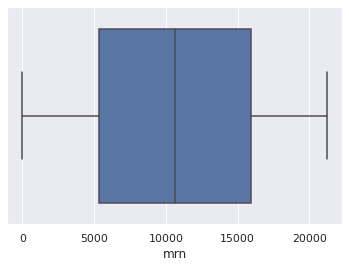

In [53]:
ax = sns.boxplot(x=ns_df["mrn"])

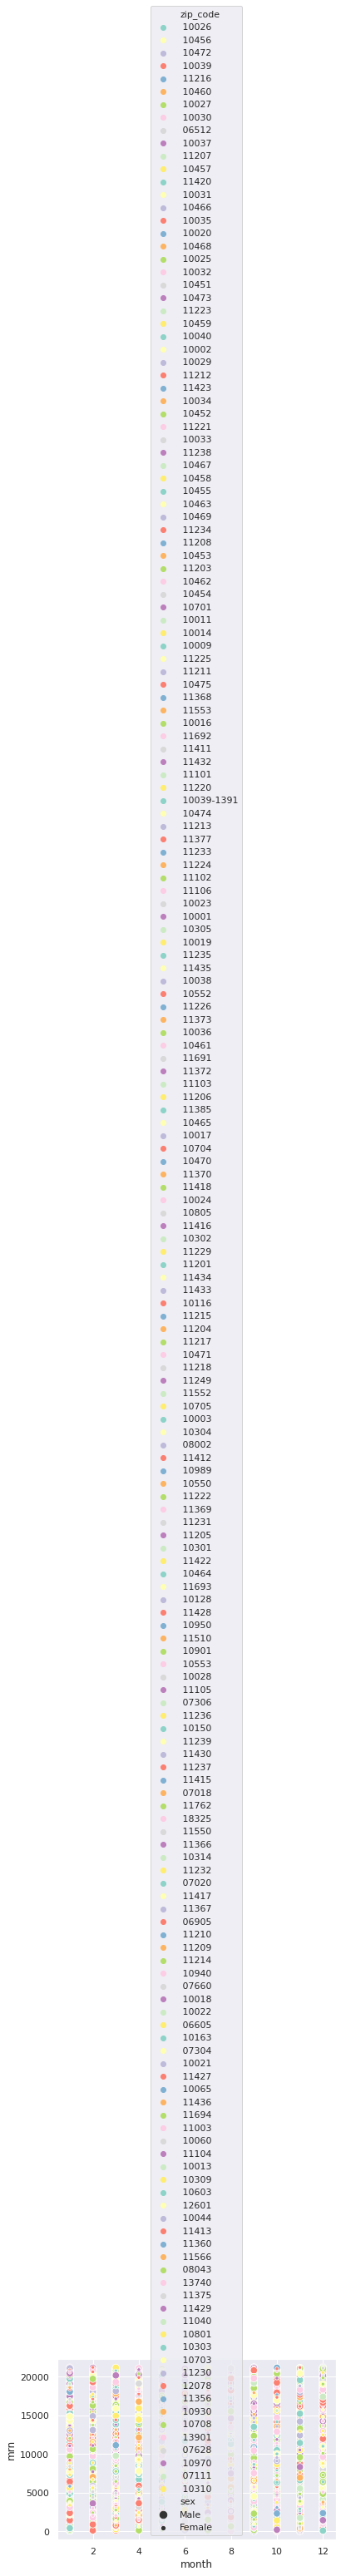

In [54]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="month", y="mrn", hue="zip_code", size="sex",
                     palette="Set3",
                     data=ns_df)

In [ ]:
ns_df.tail(1)

# Conclusion

# References:

* https://github.com/nytimes/covid-19-data
* https://pandas.pydata.org/ 
* https://plotly.com/python/range-slider/
* https://plotly.com/python/
* https://seaborn.pydata.org/
* https://matplotlib.org/